In [1]:
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [3]:
from scipy.stats import boxcox
import numpy as np

In [4]:
# necessary libraries for PCA
from sklearn.preprocessing import RobustScaler
from sklearn import decomposition  
from sklearn.preprocessing import scale  
from sklearn import preprocessing 
from sklearn import linear_model
from sklearn import model_selection

In [5]:
swandlondon_key = pd.read_csv('output_new/swandlondon_key.csv')

In [6]:
swandlondon_key.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 71 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   MSOA11CD                           1211 non-null   object 
 1   MSOA11NM                           1211 non-null   object 
 2   LAD11CD                            1211 non-null   object 
 3   LAD11NM                            1211 non-null   object 
 4   RGN11CD                            1211 non-null   object 
 5   RGN11NM                            1211 non-null   object 
 6   MSOA01CD                           1211 non-null   object 
 7   MSOA01NM                           1211 non-null   object 
 8   CHGIND                             1211 non-null   object 
 9   median_price_2001                  1211 non-null   float64
 10  median_price_2011                  1211 non-null   float64
 11  median_price_2001_la               1211 non-null   int64

In [7]:
extrac0_cols=list(swandlondon_key.iloc[:,[9,10,16,15,20,21,26,27]].columns)
swandlondon_key_extract0=swandlondon_key[extrac0_cols].copy()

[Text(0, 0, 'median_price_2001'),
 Text(1, 0, 'median_price_2011'),
 Text(2, 0, 'earnings_2001_la'),
 Text(3, 0, 'earnings_2011'),
 Text(4, 0, 'NS-SeC_higher_2001_pct'),
 Text(5, 0, 'NS-SeC_higher_2011_pct'),
 Text(6, 0, 'qualification_2001_pct'),
 Text(7, 0, 'qualification_2011_pct')]

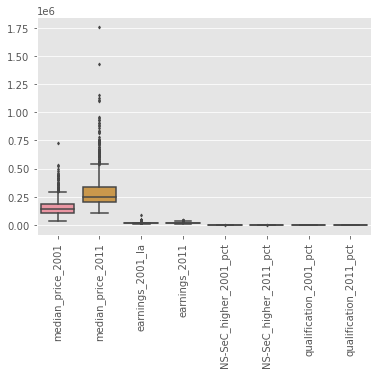

In [8]:
# raw variable 
ax = sns.boxplot(data=swandlondon_key_extract0,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [9]:
swandlondon_core = pd.read_csv('output_new/swandlondon_core.csv')

In [10]:
swandlondon_core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 45 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSOA11CD                             1211 non-null   object 
 1   MSOA11NM                             1211 non-null   object 
 2   LAD11CD                              1211 non-null   object 
 3   LAD11NM                              1211 non-null   object 
 4   RGN11CD                              1211 non-null   object 
 5   RGN11NM                              1211 non-null   object 
 6   MSOA01CD                             1211 non-null   object 
 7   MSOA01NM                             1211 non-null   object 
 8   CHGIND                               1211 non-null   object 
 9   ratio_la_median_price_2001           1211 non-null   float64
 10  ratio_la_median_price_2011           1211 non-null   float64
 11  ratio_r_median_price_2001     

In [11]:
extrac1_cols=list(swandlondon_core.iloc[:,[0,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]].columns)
swandlondon_extract1=swandlondon_core[extrac1_cols].copy()

In [12]:
swandlondon_extract1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_r_median_price_2001    1211 non-null   float64
 4   ratio_r_median_price_2011    1211 non-null   float64
 5   ratio_la_earnings_2001       1211 non-null   int64  
 6   ratio_la_earnings_2011       1211 non-null   float64
 7   ratio_r_earnings_2001        1211 non-null   float64
 8   ratio_r_earnings_2011        1211 non-null   float64
 9   ratio_la_nssec_2001          1211 non-null   float64
 10  ratio_la_nssec_2011          1211 non-null   float64
 11  ratio_r_nssec_2001           1211 non-null   float64
 12  ratio_r_nssec_2011           1211 non-null   float64
 13  ratio_la_qualifica

In [13]:
swandlondon_extract1.head()

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_r_median_price_2001,ratio_r_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_r_earnings_2001,ratio_r_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_r_nssec_2001,ratio_r_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,ratio_r_qualification_2001,ratio_r_qualification_2011
0,E02000001,1.002110,1.000000,1.532258,1.588722,1,0.296254,5.267821,1.794081,1.000000,1.000000,1.707141,1.840035,1.000000,1.000000,1.939850,1.812502
1,E02000002,1.055556,1.088235,0.612903,0.632072,1,0.939117,0.638811,0.597957,0.919113,1.004818,0.512010,0.565987,0.880126,0.871861,0.290451,0.482332
2,E02000003,1.277778,1.176471,0.741935,0.683321,1,1.111074,0.638811,0.707446,1.330238,1.284512,0.741036,0.723532,1.275540,1.124038,0.420942,0.621843
3,E02000004,1.216667,1.139706,0.706452,0.661968,1,1.067988,0.638811,0.680012,1.317318,1.222090,0.733839,0.688371,1.005091,0.856399,0.331690,0.473779
4,E02000005,0.999944,0.970588,0.580613,0.563740,1,0.990436,0.638811,0.630633,0.991056,0.955399,0.552088,0.538151,0.725467,0.842921,0.239412,0.466323


In [14]:
# check the distribution of feature columns (excluding MSOA code)

swandlondon_extract1__distribution_la = swandlondon_extract1.iloc[:,[1,2,5,6,9,10,13,14]]

swandlondon_extract1__distribution_r = swandlondon_extract1.iloc[:,[3,4,7,8,11,12,15,16]]

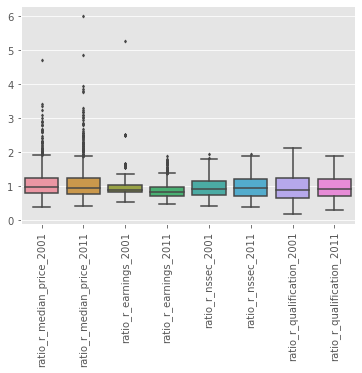

In [15]:
# ratio by region
ax = sns.boxplot( data=swandlondon_extract1__distribution_r,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.savefig('plot/p1-region-box.png',dpi = 200,bbox_inches = 'tight')

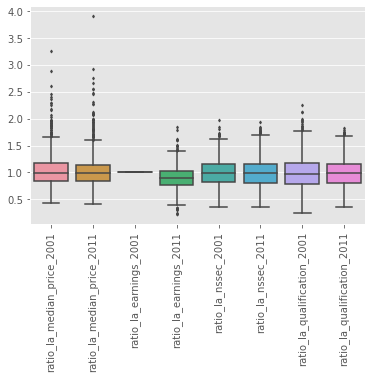

In [16]:
# ratio by la
ax = sns.boxplot( data=swandlondon_extract1__distribution_la,fliersize=2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('plot/p1-la-box.png',dpi = 200,bbox_inches = 'tight')

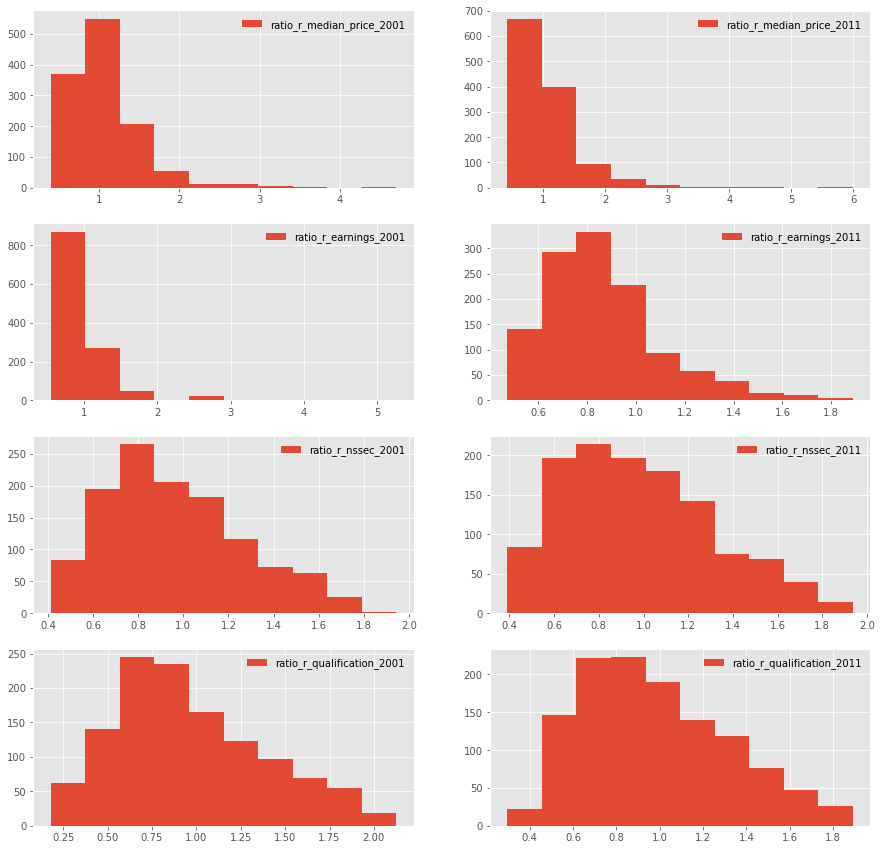

In [17]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract1__distribution_r.columns):

            ax.hist(swandlondon_extract1__distribution_r[swandlondon_extract1__distribution_r.columns[counter]], label='{}'.format(swandlondon_extract1__distribution_r.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.savefig('plot/p1-r-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

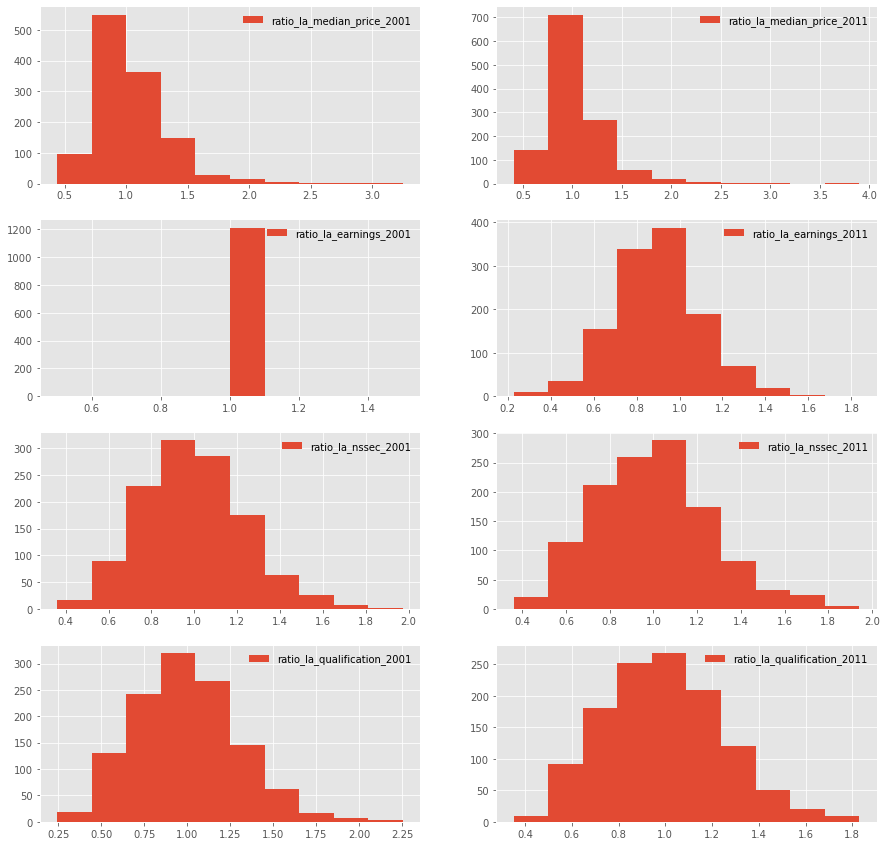

In [18]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(swandlondon_extract1__distribution_la.columns):

            ax.hist(swandlondon_extract1__distribution_la[swandlondon_extract1__distribution_la.columns[counter]], label='{}'.format(swandlondon_extract1__distribution_la.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.savefig('plot/p1-la-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

**based on the analysis above, I decided to use 'the MSOA to Local Authotity ratio of every variable' as the predictors.**

---

### Data Transformation, scaling and PCA

What did I do in this part:

1. Transform highly skewed variable. Consider which transformation approaches to use: untransformed, Box Cox or Log
2. Consider whether to scale the input varibales before PCA. 

three approaches * (to scale or not sclae) = 6 scenarios

Check the explained variance of the 1st componet for the 6scenarios

In [19]:
swandlondon_extract1_la=swandlondon_extract1.iloc[:,[0,1,2,5,6,9,10,13,14]].copy()

In [20]:
swandlondon_extract1_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MSOA11CD                     1211 non-null   object 
 1   ratio_la_median_price_2001   1211 non-null   float64
 2   ratio_la_median_price_2011   1211 non-null   float64
 3   ratio_la_earnings_2001       1211 non-null   int64  
 4   ratio_la_earnings_2011       1211 non-null   float64
 5   ratio_la_nssec_2001          1211 non-null   float64
 6   ratio_la_nssec_2011          1211 non-null   float64
 7   ratio_la_qualification_2001  1211 non-null   float64
 8   ratio_la_qualification_2011  1211 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 85.3+ KB


In [21]:
# from the distribution check above, the median housing price is heavily positive skewed.
df_transformed = swandlondon_extract1_la [[ 'ratio_la_median_price_2011','ratio_la_median_price_2001']]

In [22]:
#Box-Cox Transform
price01, lmd01a = boxcox(df_transformed['ratio_la_median_price_2001']) 
price11 = boxcox(df_transformed['ratio_la_median_price_2011'], lmbda=lmd01a)

#Log transform
price01l = np.log(df_transformed['ratio_la_median_price_2001']) 
price11l = np.log(df_transformed['ratio_la_median_price_2011'])

In [23]:
#code reference:https://github.com/jreades/urb-studies-predicting-gentrification/blob/master/04-Scoring%20Neighbourhoods.ipynb

#choose one
to_use = 'Box-Cox' # Choices: ['Untransformed','Box-Cox','Log']

if to_use == 'Untransformed':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    
elif to_use == 'Box-Cox':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    swandlondon_la_pca['ratio_la_median_price_2001']=price01
    swandlondon_la_pca['ratio_la_median_price_2011']=price11
    
elif to_use == 'Log':
    swandlondon_la_pca=swandlondon_extract1_la.copy()
    swandlondon_la_pca['ratio_la_median_price_2001']=price01l
    swandlondon_la_pca['ratio_la_median_price_2011']=price11l
    

In [24]:
df_scaling = swandlondon_la_pca.set_index('MSOA11CD')

In [25]:
df_scaling.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, E02000001 to E02006931
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ratio_la_median_price_2001   1211 non-null   float64
 1   ratio_la_median_price_2011   1211 non-null   float64
 2   ratio_la_earnings_2001       1211 non-null   int64  
 3   ratio_la_earnings_2011       1211 non-null   float64
 4   ratio_la_nssec_2001          1211 non-null   float64
 5   ratio_la_nssec_2011          1211 non-null   float64
 6   ratio_la_qualification_2001  1211 non-null   float64
 7   ratio_la_qualification_2011  1211 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 85.1+ KB


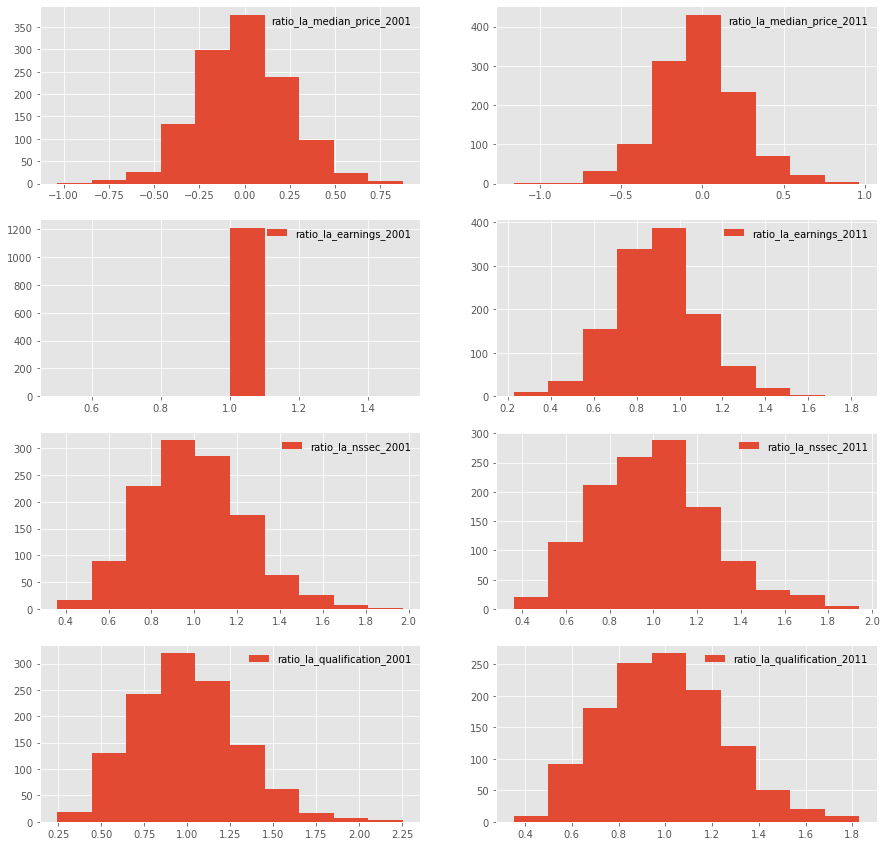

In [26]:
# creating histogram for each variable to explore their underlying distributions

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

counter = 0
for i in range(4):
    for j in range(2):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df_scaling.columns):

            ax.hist(df_scaling[df_scaling.columns[counter]], label='{}'.format(df_scaling.columns[counter]))
            leg = ax.legend(loc='upper right')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.savefig('plot/p1-la-boxcox-his.png',dpi = 200,bbox_inches = 'tight')
plt.show()

In [27]:
#pca part code reference:https://github.com/jytg17/Unpacking-the-Nuances-of-Londons-Neighbourhood-Change-Gentrification-Trajectories-codes/blob/master/2%20Scoring%20Analysis.ipynb

In [28]:
# split 2001 data from 2011 data
df_scaling_2001 = df_scaling.iloc[:,[0,2,4,6]].copy()
df_scaling_2011 = df_scaling.iloc[:,[1,3,5,7]].copy()

# stacking the 2001 data vertically with 2011 data
values_2001 = df_scaling_2001.values
values_2011 = df_scaling_2011.values
stacked_df = np.concatenate((values_2001, values_2011), axis=0)


In [29]:
df_scaling_2001.head()

,ratio_la_median_price_2001,ratio_la_earnings_2001,ratio_la_nssec_2001,ratio_la_qualification_2001
MSOA11CD,,,,
E02000001,0.002106,1,1.000000,1.000000
E02000002,0.053292,1,0.919113,0.880126
E02000003,0.229709,1,1.330238,1.275540
E02000004,0.186164,1,1.317318,1.005091
E02000005,-0.000056,1,0.991056,0.725467


In [30]:
values_2001


array([[0.00210629, 1.        , 1.        , 1.        ],
       [0.05329165, 1.        , 0.91911283, 0.88012579],
       [0.22970897, 1.        , 1.33023751, 1.27554035],
       ...,
       [0.32667888, 1.        , 1.3304387 , 1.51389269],
       [0.41358145, 1.        , 1.3304387 , 1.51389269],
       [0.4706738 , 1.        , 1.43769383, 1.78984804]])

In [31]:
# checking for NaN values before scaling and transforming
np.isnan(stacked_df).sum()

0

In [32]:
# scaling the stacked data using RobustScaler
Robust_transformer = RobustScaler().fit(stacked_df)
Robust_transformer_df = Robust_transformer.transform(stacked_df)

In [33]:
# carry out PCA to derive only the 1st principal component---scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(Robust_transformer_df)                      
PCA_scores = pd.DataFrame(pca.transform(Robust_transformer_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.72170


In [34]:
# what if one wanted to find all principal components?---scaled data

pca_all = decomposition.PCA()             
pca_all.fit(Robust_transformer_df)                      
print(pca_all.explained_variance_ratio_)

[0.72170074 0.20204315 0.06251168 0.01374442]


In [35]:
# carry out PCA to derive only the 1st principal component----not scaled data

pca = decomposition.PCA(n_components=1)             
pca.fit(stacked_df)                      
PCA_scores = pd.DataFrame(pca.transform(stacked_df))  

print("Explained variance of the SES score is: {0:6.5f}".format(pca.explained_variance_ratio_[0]))

Explained variance of the SES score is: 0.77782


In [36]:
# what if one wanted to find all principal components?----not scaled data

pca_all = decomposition.PCA()             
pca_all.fit(stacked_df)                      
print(pca_all.explained_variance_ratio_)

[0.77781821 0.11851873 0.07598514 0.02767792]


### The results of this part are as follow:

Explained variances for each scenarios:

1. Untransformed, Scaled:0.69122
2. Untransformed, Not Scaled:0.75118
3. Box-Cox Transformed, Scaled:0.72170
4. Box-Cox Transformed, Not Scaled:0.77782 (Best Performance)
5. Log Transformed, Scaled:0.71737
6. Log Transformed, Not Scaled:0.77486

### Therefore, I decided to use the results of the Box-Cox Transformed and Not Scaled data.

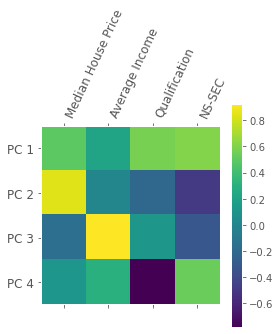

In [37]:
# visualise the constituents of each PC using heatmap

features = ["Median House Price", "Average Income", "Qualification", "NS-SEC"]

plt.matshow(pca_all.components_,cmap='viridis')
plt.yticks([0,1,2,3],['PC 1','PC 2','PC 3', 'PC 4'],fontsize=12)
plt.colorbar()
plt.xticks(range(len(features)),features,rotation=65,ha='left',fontsize=12)
plt.grid(b=None, which = "major")

plt.savefig('plot/p1-pca-heat.png',dpi = 200,bbox_inches = 'tight')
plt.show()




## PCA Score

In [38]:
# extracting scores for the respective years
PCA_2001 = pd.DataFrame(PCA_scores.iloc[0:len(df_scaling_2001),])
PCA_2011 = pd.DataFrame(PCA_scores.iloc[len(df_scaling_2001):,])

In [39]:
PCA_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 0 to 1210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1211 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


In [40]:
PCA_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1211 entries, 1211 to 2421
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1211 non-null   float64
dtypes: float64(1)
memory usage: 9.6 KB


In [41]:
# renaming their column titles
PCA_2001 = PCA_2001.rename(columns={0: "Score_2001"})
PCA_2011 = PCA_2011.rename(columns={0: "Score_2011"})

In [42]:
# attaching the 2001 and 2011 scores to their respective MSOAs in the main dataframe (df_score)
df_score = df_scaling.reset_index()

df_score["Score_2001"] = PCA_2001[:]


PCA_2011 = PCA_2011.reset_index(drop=True)
df_score["Score_2011"] = PCA_2011

In [43]:
# main dataframe
df_score

,MSOA11CD,ratio_la_median_price_2001,ratio_la_median_price_2011,ratio_la_earnings_2001,ratio_la_earnings_2011,ratio_la_nssec_2001,ratio_la_nssec_2011,ratio_la_qualification_2001,ratio_la_qualification_2011,Score_2001,Score_2011
0,E02000001,0.002106,0.000000,1,0.296254,1.000000,1.000000,1.000000,1.000000,0.024650,-0.127976
1,E02000002,0.053292,0.082671,1,0.939117,0.919113,1.004818,0.880126,0.871861,-0.070211,-0.024384
2,E02000003,0.229709,0.155645,1,1.111074,1.330238,1.284512,1.275540,1.124038,0.496759,0.364790
3,E02000004,0.186164,0.126294,1,1.067988,1.317318,1.222090,1.005091,0.856399,0.301986,0.140902
4,E02000005,-0.000056,-0.030093,1,0.990436,0.991056,0.955399,0.725467,0.842921,-0.149864,-0.115368
...,...,...,...,...,...,...,...,...,...,...,...
1206,E02006925,0.268154,0.249418,1,0.942860,1.008300,1.030513,1.003960,1.003886,0.163447,0.154652
1207,E02006927,0.019738,0.109976,1,1.009995,1.032484,1.197407,1.110605,1.117053,0.119921,0.265865
1208,E02006929,0.326679,0.165346,1,1.084409,1.330439,1.361248,1.513893,1.395078,0.690937,0.574284
1209,E02006930,0.413581,0.384463,1,1.293101,1.330439,1.583365,1.513893,1.593996,0.733916,0.977763


In [44]:
df_score.to_csv('output_new/df_score.csv',index=False)